# Computing historical APY/APR from Compound and Aave


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
dfc=pd.read_csv('data/Compound_data.csv')
dfa=pd.read_csv('data/aave_data.csv')
dfc

,Unnamed: 0,SupplyAPR,SupplyAPY,BorrowAPR,BorrowAPY,TotalSupply,TotalBorrow,timestamp,date
0,0,0.000654,0.000654,0.026867,0.027232,0.001754,10721.873277,16121480,2022-12-05 22:10:23
1,1,0.000688,0.000688,0.027144,0.027516,0.001755,11161.236483,16128126,2022-12-06 20:25:11
2,2,0.000680,0.000680,0.027077,0.027447,0.001751,11028.216334,16134772,2022-12-07 18:59:35
3,3,0.000692,0.000693,0.027182,0.027555,0.001746,11158.577363,16141419,2022-12-08 17:15:35
4,4,0.000699,0.000699,0.027235,0.027609,0.001751,11275.725349,16148065,2022-12-09 15:33:59
...,...,...,...,...,...,...,...,...,...
361,361,0.009191,0.009233,0.021927,0.022169,44741.267095,14488.100063,18520745,2023-11-07 14:42:59
362,362,0.008419,0.008454,0.020920,0.021141,44739.847158,13270.950938,18527391,2023-11-08 12:59:23
363,363,0.008227,0.008261,0.020671,0.020886,46300.501472,13421.589137,18534038,2023-11-09 11:17:59
364,364,0.010923,0.010983,0.024185,0.024480,44715.799587,17209.167714,18540684,2023-11-10 09:34:59


and aave's

In [2]:
dfa

,Unnamed: 0,variableBorrowRate,utilizationRate,liquidityRate,timestamp,stableBorrowRate,totalLiquidity,totalATokenSupply,availableLiquidity,depositAPY,variableBorrowAPY,stableBorrowAPY,ReserveSizeToken,AvailableLiquidityToken,time
0,0,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
1,58,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
2,57,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
3,56,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
4,55,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,0.030802,0.726475,0.019100,1699333859,0.100423,412048786242975816354068,416655674105733854502943,112705733920303732222553,0.019283,0.031281,0.105638,416655.674106,112705.733920,2023-11-07 05:10:59
363,363,0.029877,0.704338,0.017970,1699422047,0.099450,435584159201048231280762,440231221934140955932204,128785895839752667173518,0.018133,0.030328,0.104563,440231.221934,128785.895840,2023-11-08 05:40:47
364,364,0.029753,0.701465,0.017821,1699506179,0.099319,433534390067027397664014,438203510166900686323089,129425153499919889336481,0.017981,0.030200,0.104418,438203.510167,129425.153500,2023-11-09 05:02:59
365,365,0.027809,0.654715,0.015569,1699592723,0.097273,411544576485378928892992,416234296916104118834259,142100345930469615527373,0.015691,0.028200,0.102161,416234.296916,142100.345930,2023-11-10 05:05:23


Notice that Compound III has an additional rewards of 1.5%, so we add this to the previous dataset

## Compound 

/var/folders/wz/tdmt_j1d4_d876mcvb5071480000gn/T/ipykernel_13293/867650784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['date']=pd.to_datetime(dfc['date'])


[*********************100%***********************]  1 of 1 completed


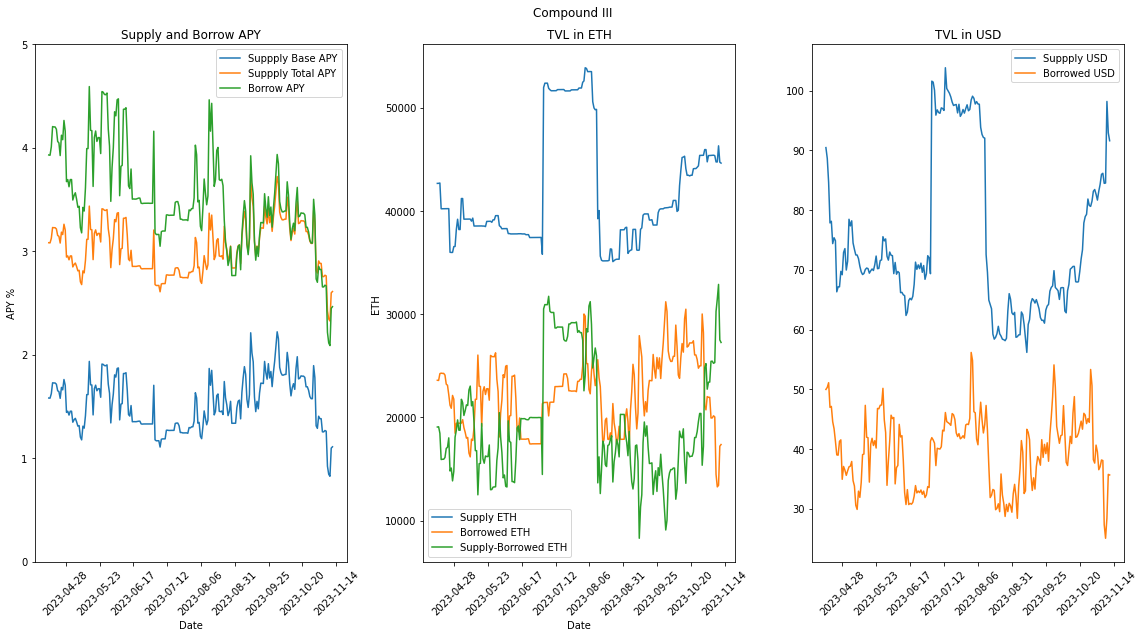

In [3]:
dfc['reward']=0.015
dfc=dfc[dfc['date']>'2023-04-15']
dfc['date']=pd.to_datetime(dfc['date'])
dfc.set_index('date', inplace=True)
resampled_df = dfc.resample('D').mean()

price_eth=yf.download('ETH-USD')['Close']
price_eth=price_eth[price_eth.index>=dfc.index[0]]
price_eth=price_eth[price_eth.index<=dfc.index[-1]]



plt.figure(figsize=(16,9))
plt.subplot(131)

plt.plot(100*(dfc['SupplyAPY']), label='Suppply Base APY')
plt.plot(100*(dfc['SupplyAPY']+dfc['reward']), label='Suppply Total APY')
plt.plot(100*(dfc['BorrowAPY']), label='Borrow APY')
plt.ylim([0,5])
plt.title('Supply and Borrow APY')
plt.xlabel('Date')
plt.ylabel('APY %')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()

plt.subplot(132)

plt.plot(dfc['TotalSupply'], label='Supply ETH')
plt.plot(dfc['TotalBorrow'], label='Borrowed ETH')
plt.plot(dfc['TotalSupply']-dfc['TotalBorrow'], label='Supply-Borrowed ETH')
plt.xlabel('Date')
plt.ylabel('ETH')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()
plt.title('TVL in ETH')
plt.tight_layout()


plt.subplot(133)
plt.plot(resampled_df['TotalSupply']*price_eth/1e6, label='Suppply USD')
plt.plot(resampled_df['TotalBorrow']*price_eth/1e6, label='Borrowed USD')
plt.title('TVL in USD')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()
plt.suptitle('Compound III')
plt.tight_layout()

plt.savefig('results_compound.png',transparent=False)

## AAVE

In [4]:
dfa

,Unnamed: 0,variableBorrowRate,utilizationRate,liquidityRate,timestamp,stableBorrowRate,totalLiquidity,totalATokenSupply,availableLiquidity,depositAPY,variableBorrowAPY,stableBorrowAPY,ReserveSizeToken,AvailableLiquidityToken,time
0,0,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
1,58,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
2,57,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
3,56,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
4,55,0.010000,0.000000,0.000000,1674806411,0.068000,40000000000000000,40000000000000000,40000000000000000,0.000000,0.010050,0.070365,0.040000,0.040000,2023-01-27 08:00:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,0.030802,0.726475,0.019100,1699333859,0.100423,412048786242975816354068,416655674105733854502943,112705733920303732222553,0.019283,0.031281,0.105638,416655.674106,112705.733920,2023-11-07 05:10:59
363,363,0.029877,0.704338,0.017970,1699422047,0.099450,435584159201048231280762,440231221934140955932204,128785895839752667173518,0.018133,0.030328,0.104563,440231.221934,128785.895840,2023-11-08 05:40:47
364,364,0.029753,0.701465,0.017821,1699506179,0.099319,433534390067027397664014,438203510166900686323089,129425153499919889336481,0.017981,0.030200,0.104418,438203.510167,129425.153500,2023-11-09 05:02:59
365,365,0.027809,0.654715,0.015569,1699592723,0.097273,411544576485378928892992,416234296916104118834259,142100345930469615527373,0.015691,0.028200,0.102161,416234.296916,142100.345930,2023-11-10 05:05:23


/var/folders/wz/tdmt_j1d4_d876mcvb5071480000gn/T/ipykernel_13293/3684960857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['time']=pd.to_datetime(dfa['time'])


[*********************100%***********************]  1 of 1 completed


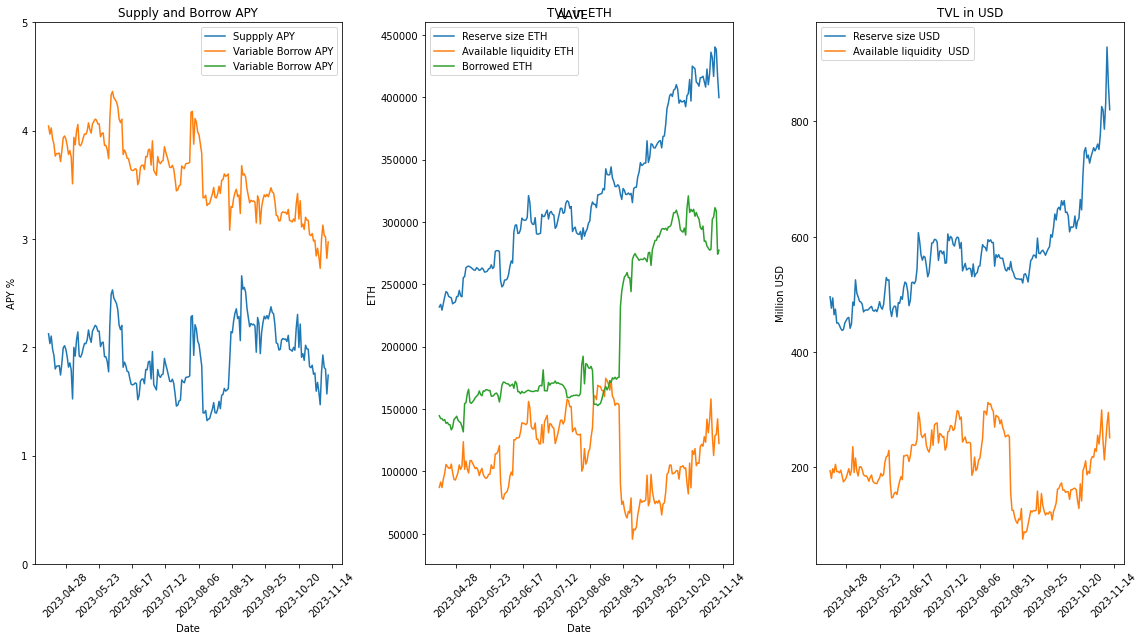

In [5]:
dfa=dfa[dfa['time']>'2023-04-15']
dfa['time']=pd.to_datetime(dfa['time'])
dfa.set_index('time', inplace=True)
resampled_df = dfa.resample('D').mean()

price_eth=yf.download('ETH-USD')['Close']
price_eth=price_eth[price_eth.index>=dfa.index[0]]
price_eth=price_eth[price_eth.index<=dfa.index[-1]]





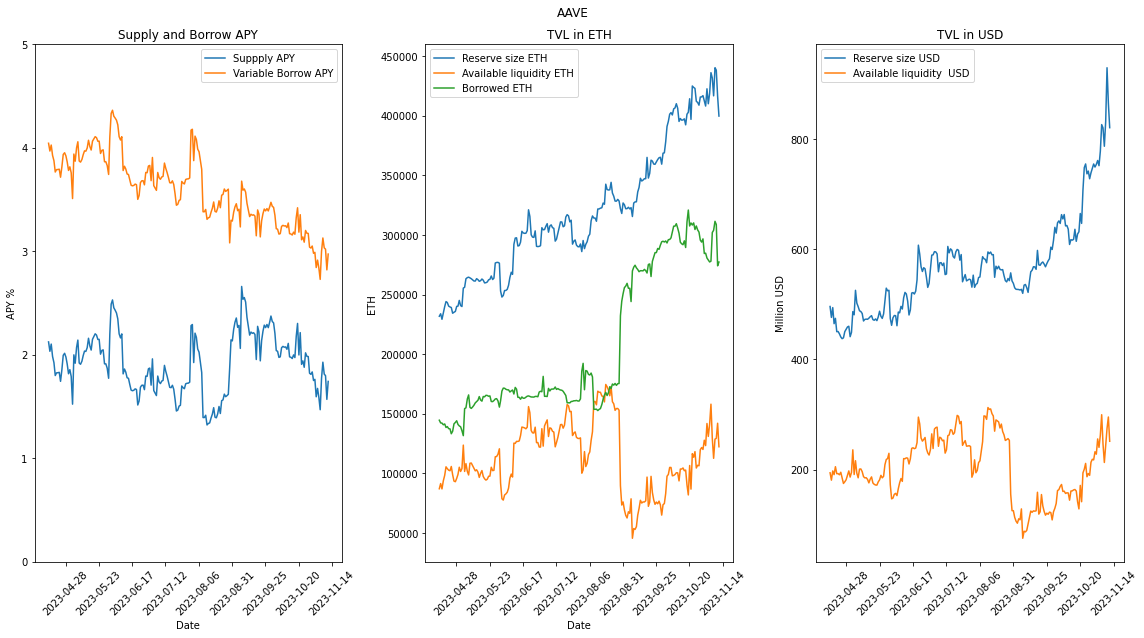

In [8]:
plt.figure(figsize=(16,9))
plt.subplot(131)

plt.plot(100*(dfa['depositAPY']), label='Suppply APY')
plt.plot(100*(dfa['variableBorrowAPY']), label='Variable Borrow APY')
plt.ylim([0,5])
plt.title('Supply and Borrow APY')
plt.xlabel('Date')
plt.ylabel('APY %')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()

plt.subplot(132)

plt.plot(dfa['ReserveSizeToken'], label='Reserve size ETH')
plt.plot(dfa['AvailableLiquidityToken'], label='Available liquidity ETH')
plt.plot(dfa['ReserveSizeToken']-dfa['AvailableLiquidityToken'], label='Borrowed ETH')
plt.xlabel('Date')
plt.ylabel('ETH')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()
plt.title('TVL in ETH')
plt.tight_layout()


plt.subplot(133)
plt.plot(resampled_df['ReserveSizeToken']*price_eth/1e6, label='Reserve size USD')
plt.plot(resampled_df['AvailableLiquidityToken']*price_eth/1e6, label='Available liquidity  USD')
plt.title('TVL in USD')
plt.xticks(rotation=45)
plt.ylabel('Million USD')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
plt.legend()

plt.suptitle('AAVE')
plt.tight_layout()

plt.savefig('results_aave.png',transparent=False)